In [47]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import os

In [48]:
lmax = 2000
Tcmb  = 2.726e6    # CMB temperature in microkelvin?
rlmin, rlmax = 2, 2000 # CMB multipole range for reconstruction
nside = 2048
bstype = 'equi'
nsims = 448 # Number of simulations to average over (in sets of 3) 
ellmin = 2 
ellmax = 2000 ##### check!!!! vs sims
ls, cl_unl, cl_len, cl_phi = np.loadtxt('/home/amb257/kappa_bispec/make_sims_parallel/camb_lencl_phi.txt')
L_lots = np.arange(rlmax+1)
Lfac = (L_lots*(L_lots+1.) / 2 )**2
lcl = cl_len[0:rlmax+1] / Tcmb**2
print('lcl not interp', lcl[lmax])
ucl = cl_unl[0:rlmax+1] / Tcmb**2 #dimless unlensed T Cl
cl_kappa = Lfac * cl_phi[0:rlmax+1]
l_bins = np.arange(0,100,10)
cl_where = cl_kappa[l_bins]
print(cl_where)

lcl not interp 4.6554353095210565e-17
[0.00000000e+00 1.66870490e-07 2.06031272e-07 2.17543630e-07
 2.17004910e-07 2.10657754e-07 2.01537811e-07 1.91161657e-07
 1.80472047e-07 1.69897924e-07]


In [49]:
# Load in optimal estimator results
L_opt_fold, opt_est_fold, err_fold = np.loadtxt('opt_est_results/folded_opt_est.txt')
L_opt_equi, opt_est_equi, err_equi = np.loadtxt('opt_est_results/equilateral_opt_est.txt')


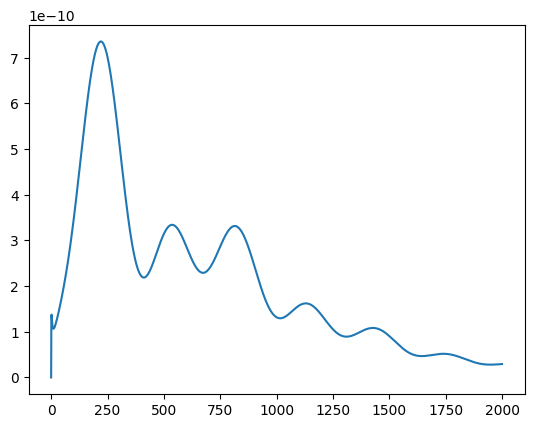

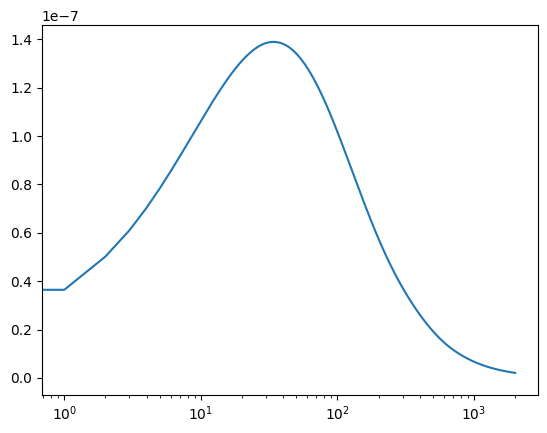

In [50]:
# Running some checks on the power spectra used

# Define the directory where power spec are stored
input_dir = "power_spec"

# Load the power spec
L = np.load(os.path.join(input_dir, "L.npy"))
cl_phi = np.load(os.path.join(input_dir, "cl_phi.npy"))
ucl = np.load(os.path.join(input_dir, "ucl.npy"))
ctot = np.load(os.path.join(input_dir, "ctot.npy"))

plt.plot(L, L*(L+1) / (2*np.pi) *ucl)
plt.show()
plt.plot(L, (L*(L+1))**2*cl_phi /  (2*np.pi))
plt.xscale('log')
plt.show()

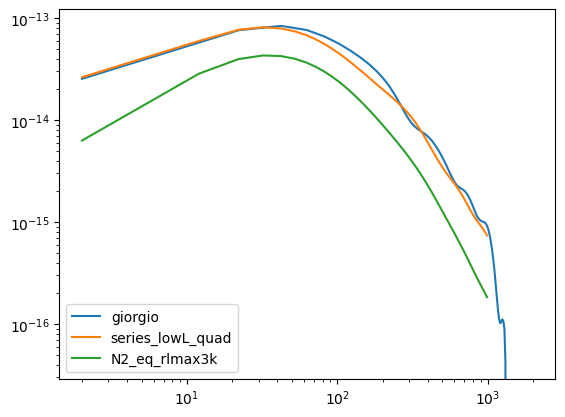

In [51]:
LensingL, testquad = np.loadtxt('No_l_factors_mathematica_TEST_quad_equi.txt')
L_eq_rlmax3k, N2_eq_rlmax3k = np.loadtxt('Low_L_equi_rlmax3000.txt')
L_r3k_fac = (L_eq_rlmax3k*(L_eq_rlmax3k+1.))**3 / 8
#LensingL, testdirect = np.loadtxt('TEST_direct_equi.txt')
_, minusincorrect_testquad = np.loadtxt('minusincorrect_TEST_quad_equi.txt')
_, minusincorrect_testdirect = np.loadtxt('minusincorrect_TEST_direct_equi.txt')
# import giorgio results
L_analytic, N2_6pt = np.loadtxt("/home/amb257/kappa_bispec/optimal_est/Plots/data/data_for_paper/numerical_N2/Giorgio_equi_N2_analytic.txt")
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.loglog(LensingL, ((LensingL+1) / LensingL)**2 *1/8*(LensingL*(LensingL+1))**3 * testquad, label='series_lowL_quad')
plt.loglog(L_eq_rlmax3k, L_r3k_fac*N2_eq_rlmax3k, label='N2_eq_rlmax3k')
#plt.loglog(LensingL, -1*testdirect, ls = '--', label='series_lowL_directsum')
#plt.loglog(LensingL, minusincorrect_testquad, label='minusincorrect_series_lowL_quad')
#plt.xlim(1,200)
plt.legend()

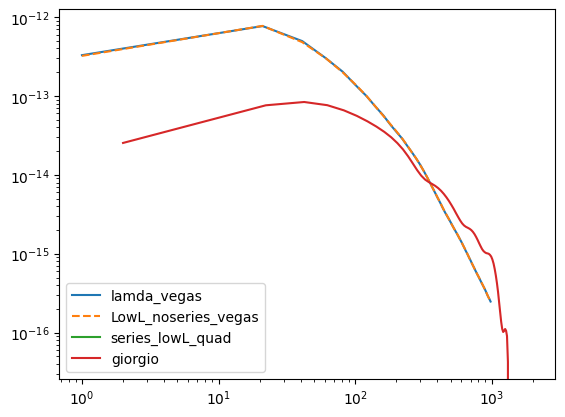

In [52]:
input_dir = "vegas_results"
L = np.load(os.path.join(input_dir, "L.npy"))
lambda_L = np.load(os.path.join(input_dir, "lambda_L.npy"))
lamda_vegas_lowL = np.load(os.path.join(input_dir, "lambda_VEGAS_lowL.npy"))

Lfac_kappa = (0.5*L*(L+1))**3 
lambda_Lfac = (0.5*lambda_L*(lambda_L+1))**3 
vegas_lowL = np.load(os.path.join(input_dir, "VEGAS_lowL.npy"))
nonoise_vegas_lowL = np.load(os.path.join(input_dir, "nonoise_VEGAS_lowL.npy"))

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(lambda_L, lambda_Lfac*lamda_vegas_lowL,label = 'lamda_vegas')
plt.loglog(L, Lfac_kappa*vegas_lowL, ls = '--',label = 'LowL_noseries_vegas')
plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

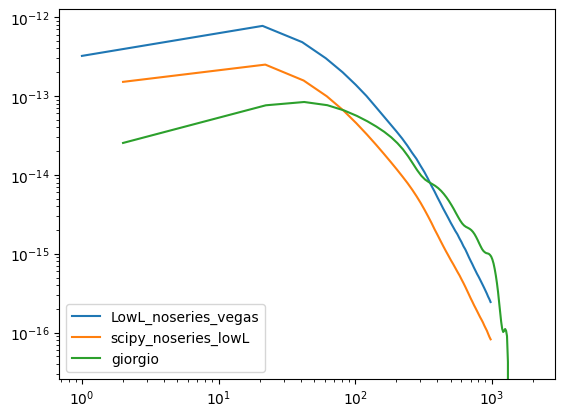

In [53]:
input_dir = "scipy_results"
L_scipy = np.load(os.path.join(input_dir, "L.npy"))

Lfac_kappa_scipy = (0.5*L_scipy*(L_scipy+1))**3 
scipy_lowL = np.load(os.path.join(input_dir, "scipy_lowL_noseries.npy"))
plt.loglog(L, Lfac_kappa*vegas_lowL, label = 'LowL_noseries_vegas')

#plt.loglog(L, Lfac_kappa*nonoise_vegas_lowL, label = 'nonoise_LowL_noseries_vegas')
plt.loglog(L_scipy, Lfac_kappa_scipy*scipy_lowL, label = 'scipy_noseries_lowL')

#plt.loglog(LensingL,-1*testquad, label='series_lowL_quad')
plt.loglog(L_analytic, N2_6pt, label='giorgio')
plt.legend()

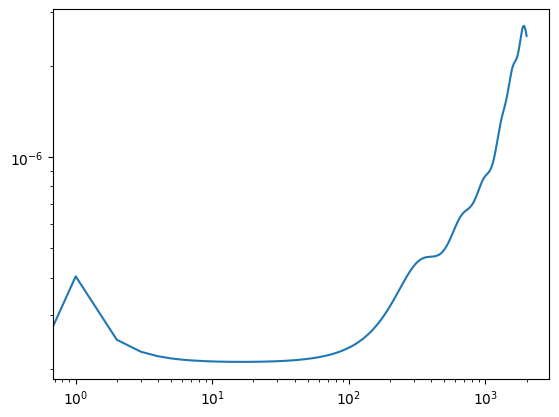

In [54]:
L_norm, norm_phi = np.loadtxt('norm_phi.txt')
Lfac_norm = (0.5*L_norm*(L_norm+1.))**2
plt.loglog(L_norm, Lfac_norm*norm_phi)
#This looks legit.

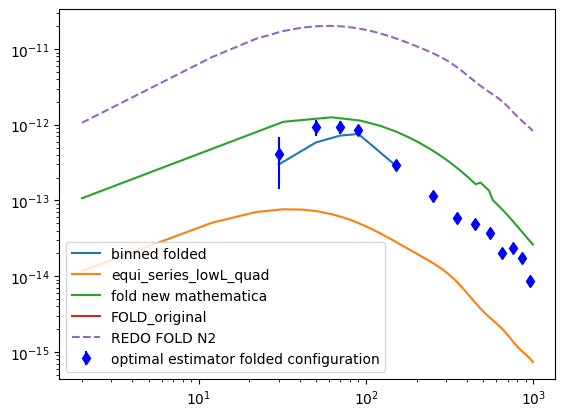

In [55]:
""" Now test folded series expansion N2 """

### Notes - shape driven almost totally by setting A1,2,3. Setting A(L/2) twice and A(L) then leaving Clphis as C(L) gives pretty much bang on. Why wouldn't the clphi"s L change though?
### Changing to any Clphi(L/2) makes it too large (even just one of the two)
bin_mid_fld, binning_test_fld = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_folded.npy')

L_redo, N2_redo = np.loadtxt('n2_bias_results.txt')
LensingL_fold, N2_fold = np.loadtxt('N2_fold.txt')
LensingL_fold, direct_fold = np.loadtxt('direct_fold.txt')
L_samenorm, fold_samenorm = np.loadtxt('same_norm_quad_fold.txt')
L_newmathematica, fold_N2_newmathematica = np.loadtxt('new_mathematica_N2_fold.txt')
Lfac = LensingL_fold*(LensingL_fold+1)  * (LensingL_fold/2*(LensingL_fold/2+1))**2
Lfac_mathematica = L_newmathematica*(L_newmathematica+1)  * (L_newmathematica/2*(L_newmathematica/2+1))**2


L_As_same, fold_As_same = np.loadtxt('allAs_same_norm_quad_fold.txt')
L_opt_fold, opt_est_fold, err_fold = np.loadtxt('folded_opt_est.txt')
plt.loglog(bin_mid_fld, binning_test_fld, label = 'binned folded')
plt.loglog(LensingL, 1/8*(LensingL*(LensingL+1))**3 * testquad, label='equi_series_lowL_quad')
plt.loglog(L_newmathematica, 1/8*Lfac_mathematica * fold_N2_newmathematica, label='fold new mathematica')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.loglog(LensingL_fold, -1/8*Lfac*N2_fold, label='FOLD_original')
plt.loglog(LensingL_fold, -1/8*(LensingL_fold*(LensingL_fold+1))**3*direct_fold, label='FOLD_original')

plt.loglog(L_redo, -1/8*(L_redo*(L_redo+1))**3*N2_redo,  ls = '--', label='REDO FOLD N2')

plt.legend()

[-2.37106550e-15 -2.74283947e-14 -4.21614032e-14 -4.76539841e-14
 -4.80552227e-14 -4.58667004e-14 -4.25175455e-14 -3.87593022e-14
 -3.50095147e-14 -3.14651844e-14 -2.82284718e-14 -2.53195900e-14
 -2.27389502e-14 -2.04632926e-14 -1.84644582e-14 -1.67084241e-14
 -1.51644218e-14 -1.38058932e-14 -1.26093447e-14 -1.15525049e-14
 -1.06148017e-14 -9.77890095e-15 -9.03129742e-15 -8.36017241e-15
 -7.75493930e-15 -7.20612233e-15 -6.70584707e-15 -6.24848524e-15
 -5.82912768e-15 -5.44333302e-15 -5.08707366e-15 -4.75702079e-15
 -4.45085871e-15 -4.16654360e-15 -3.90218053e-15 -3.65600112e-15
 -3.42651184e-15 -3.21267202e-15 -3.01350589e-15 -2.82805319e-15
 -2.65536825e-15 -2.49460010e-15 -2.34508210e-15 -2.20616218e-15
 -2.07717855e-15 -1.95746780e-15 -1.84638372e-15 -1.74331483e-15
 -1.64766400e-15 -1.55884891e-15 -1.47630796e-15 -1.39952100e-15
 -1.32803775e-15 -1.26143272e-15 -1.19930142e-15 -1.14126227e-15
 -1.08696070e-15 -1.03607749e-15 -9.88316351e-16 -9.43404101e-16
 -9.01089480e-16 -8.61148

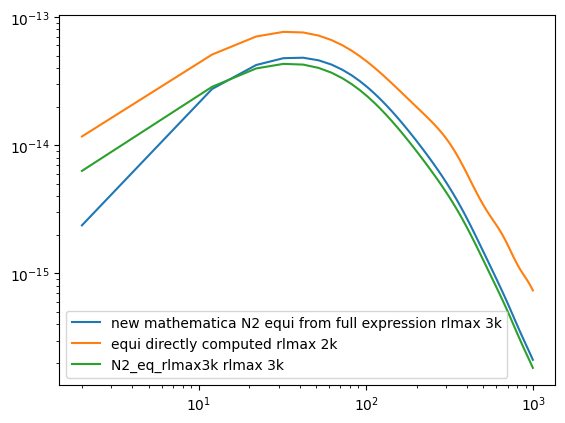

In [56]:
# Here we test the full integral which will be used for understanding binning effects and compute it for the equilateral configuration and compare to existing calculation

L_equi_from_full, N2_equi_full = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/equilN2_from_full_int.txt')
print(N2_equi_full_test)
print(testquad)
plt.loglog(L_equi_from_full, -1*N2_equi_full, label = 'new mathematica N2 equi from full expression rlmax 3k')
plt.loglog(LensingL, 1/8*(LensingL*(LensingL+1))**3 * testquad, label='equi directly computed rlmax 2k')
plt.loglog(L_eq_rlmax3k, L_r3k_fac*N2_eq_rlmax3k, label='N2_eq_rlmax3k rlmax 3k')
plt.legend()


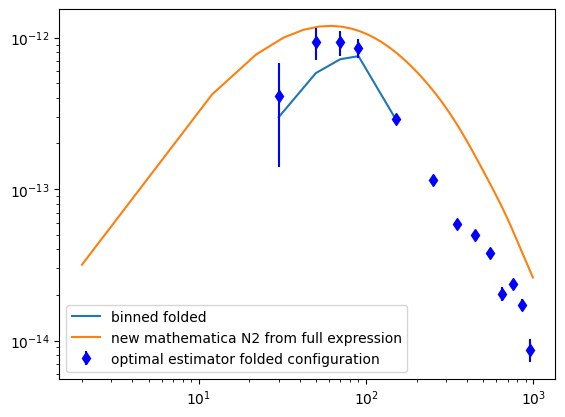

In [62]:
# test full expression for folded configuration note the full_N2_series_integral.py script computes this for KAPPA 
L_newmath_full, N2_fold_newmath_full = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/foldN2_from_full_int.txt')
Lfac_bin_fold = 1/8 * (L_test_fold*(L_test_fold+1)) * (L_test_fold/2*(L_test_fold/2+1))**2
plt.loglog(bin_mid_fld, binning_test_fld, label = 'binned folded')
#plt.loglog(L_test_fold, N2_fold_full_test, label = 'test fold from full expression')
plt.loglog(L_newmath_full, N2_fold_newmath_full, label = 'new mathematica N2 from full expression')
plt.errorbar(L_opt_fold, -1*opt_est_fold, yerr = err_fold, fmt='bd', label = 'optimal estimator folded configuration')
#plt.loglog(L_newmathematica, 1/8*Lfac_mathematica * fold_N2_newmathematica, label='fold new mathematica direct calc')
plt.legend()


[ 4.70167054e-14 -1.98457279e-14 -2.87370727e-14 -2.70369880e-14
  2.23280129e-14]


(0.0, 1000.0)

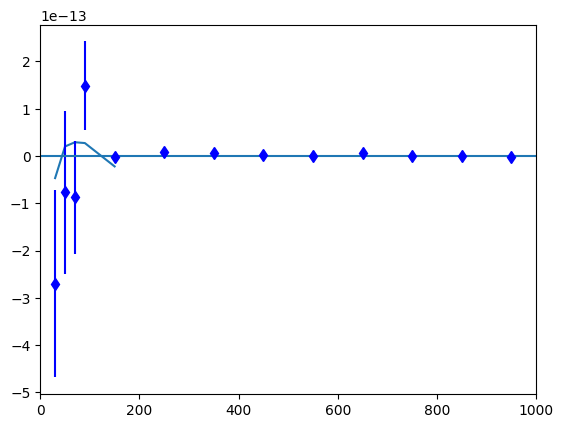

In [61]:
bin_mid, binning_test = np.load('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/Binning_effects/outputs/binned_equilateral.npy')
print(binning_test)
plt.plot(bin_mid, -1* binning_test)
plt.errorbar(L_opt_equi, opt_est_equi, yerr = err_equi, fmt='bd', label = 'optimal estimator folded configuration')
plt.hlines(0, 0, 1000)
plt.xlim(0,1000)


In [59]:
# Load in the integrand used for the direct sum calculation
ell, integrand = np.loadtxt('/home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt')
plt.plot(ell, integrand)
print(np.sum(integrand))
integral = np.trapz(integrand, ell)
print(integral)
plt.xlim(500,800)

OSError: /home/amb257/kappa_bispec/bispec_opt_est/N2_numerical/integrand_direct_sum_10.0.txt not found.

In [ ]:
L, direct_int = np.loadtxt('new_direct_sum_integeral.txt')
#L, direct_int = np.loadtxt('integral_direct_sum_10.0.txt')
plt.plot(L, direct_int)
plt.xlabel('L')
print(direct_int)

: 

In [ ]:
plt.loglog(L_lots, cl_kappa**2)
plt.xlim(20,1000)

: 

: 

In [ ]:
L, ctotprime = np.loadtxt('ctotprime.txt')
L, lclprime = np.loadtxt('lclprime.txt')
L, lcldoubleprime = np.loadtxt('lcldoubleprime.txt')
L, lcl = np.loadtxt('lcl.txt')
L, ocl = np.loadtxt('ocl.txt')
plt.plot(L, L* lclprime / lcl, label='lclprime')
plt.plot(L, L* ctotprime / lcl, label = 'ctotprime')
plt.xscale('log')
plt.legend()

: 

In [ ]:
plt.plot(L, L* ctotprime / lcl - L* lclprime / lcl)

: 

In [ ]:
plt.loglog(L, lcl, label = 'lcl')
plt.loglog(L, ocl-lcl, label = 'ocl-lcl')
plt.legend()

: 

In [ ]:
print(lcl[0:2])
print(ocl[0:2])

: 

In [ ]:
plt.plot(L, L**2 / lcl * lcldoubleprime)

: 

In [ ]:
import numpy as np
from numpy import random 
from scipy.integrate import quad
# Define a random integrand
def integrand_fn(ell):
    integrand = 1e-11*np.cos(ell / 100) * np.sin(ell / 300) + random.rand()*1e-12
    return integrand

# Set integration limits
ellmin = 2
ellmax = 100

integrand_values = []
for ell in np.arange(ellmin, ellmax + 1):
    integrand = integrand_fn(ell)
    integrand_values.append(integrand)

# Now write some code to integrate this using quad
integral_quad, error = quad(integrand_fn, ellmin, ellmax, limit=1000)

# Now compute the same integrand using direct summation
integral_direct_sum = np.sum(integrand_values)

print('quad', integral_quad)
print('direct sum', integral_direct_sum)

: 

In [ ]:
ell = np.arange(ellmin, ellmax + 1)
plt.plot(ell, integrand_values)


: 

: 